['elephant', '128', '4', '145.18', 'samples']


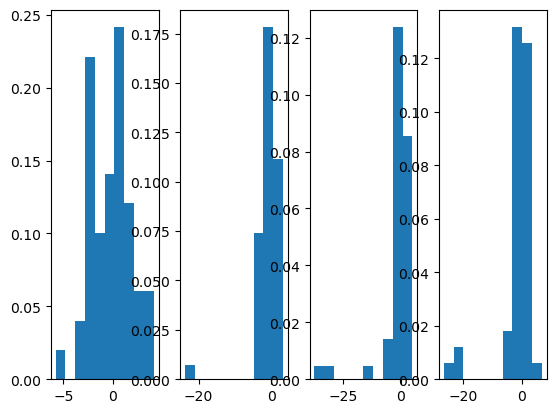

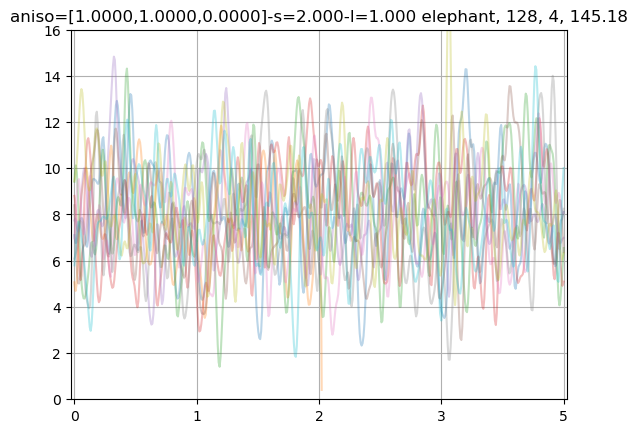

['elephant', '256', '4', '145.18', 'samples']


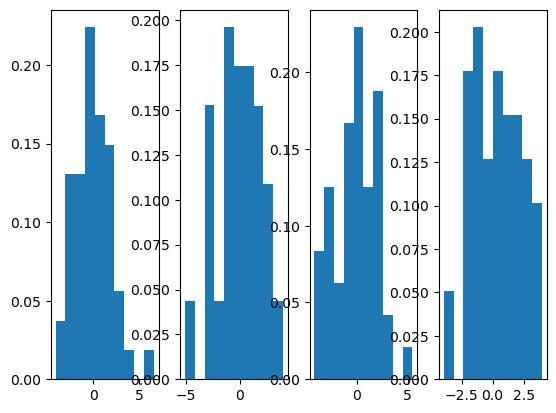

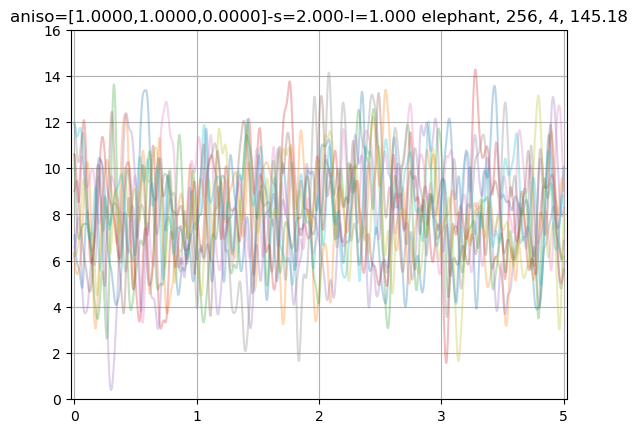

['elephant', '32', '4', '145.18', 'samples']


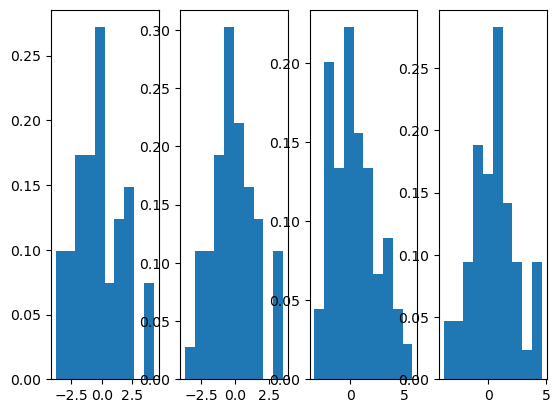

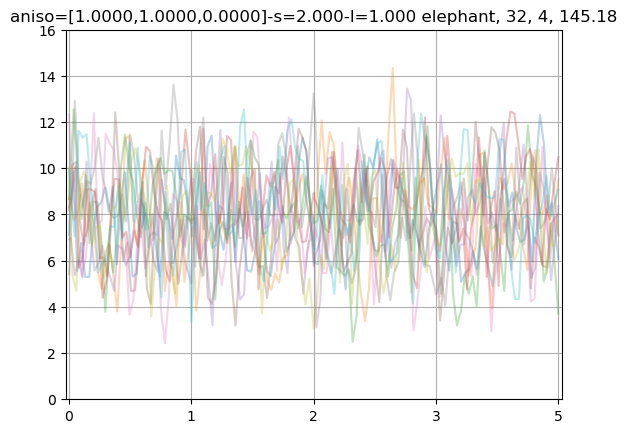

['elephant', '64', '4', '145.18', 'samples']


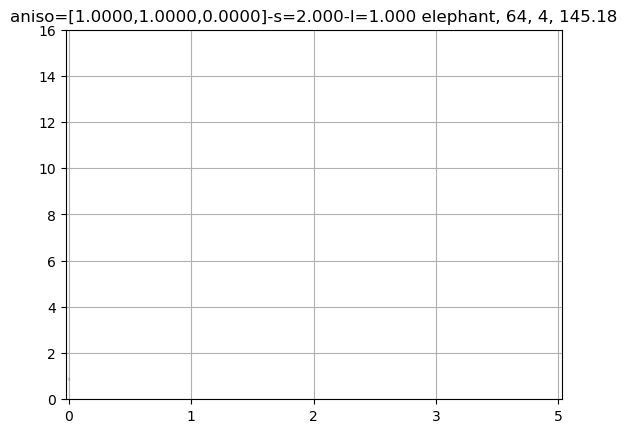

['elephant', '32', '4', '41.00', 'samples']


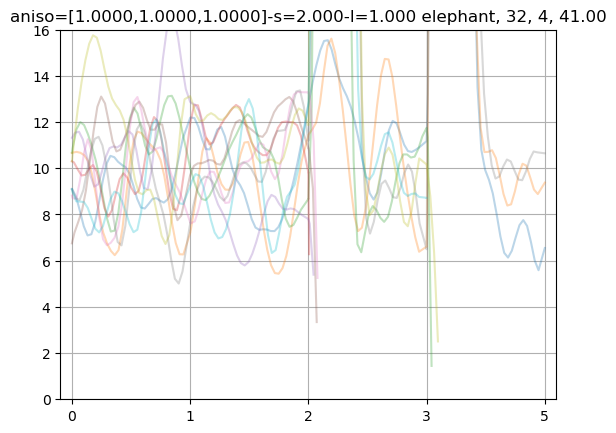

['elephant', '8', '4', '1.43', 'samples']


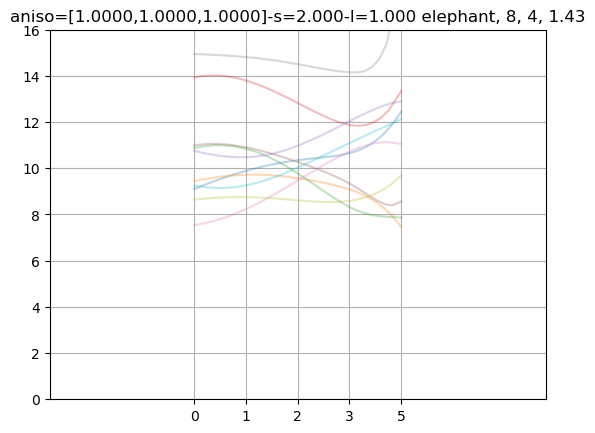

['elephant', '8', '4', '10.25', 'samples']


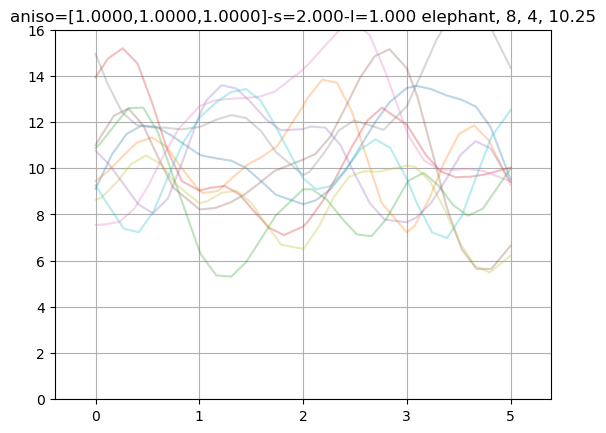

['elephant', '8', '4', '14.69', 'samples']


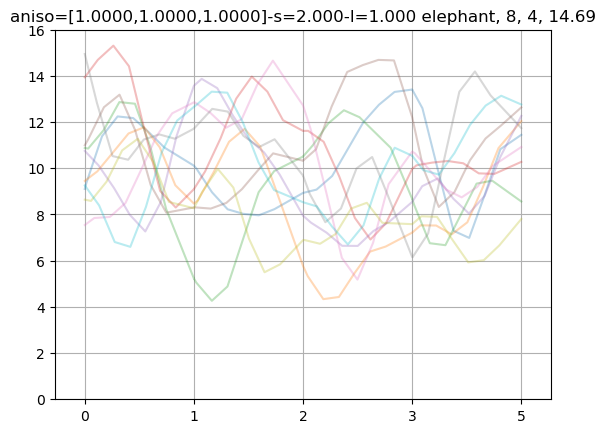

['elephant', '8', '4', '4.54', 'samples']


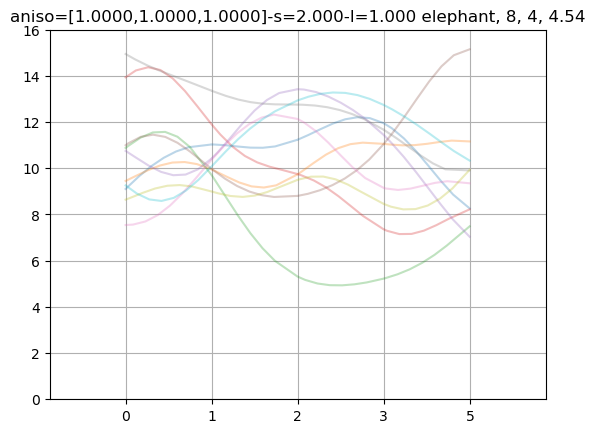

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from utils import *
from scipy.stats import gaussian_kde

def first_threshold_crossing_t(vt,ts,vals):
    ft = np.argmax(vals <= vt, axis=1) - 1
    x = np.indices(ft.shape)
    return ts[x,ft], vals[x,ft].flatten(), ft


PLOT_REAL_COUNT = 10

for file in glob.glob("testing/ray-realizations/se/*/*elephant*-samples.bin"):


    file = file.replace("\\", "/")

    cov = file.split("/")[3]

    info = os.path.splitext(os.path.basename(file))[0].split("-")

    print(info)

    ctxt = info[0].replace("elephant", "elephant-1")
    microSteps = int(info[1])
    macroSteps = int(info[2])
    distance = float(info[3])

    nps = microSteps * macroSteps

    ts = np.reshape(np.fromfile(file.replace("samples.", "ts."), dtype=np.float64), (-1,nps))
    samples = np.reshape(np.fromfile(file, dtype=np.float64), (-1,nps))

    if os.path.exists(file.replace("samples.", "derivs.")):
        derivs = np.reshape(np.fromfile(file.replace("samples.", "derivs."), dtype=np.float64), (-1,macroSteps))

        fig, axs = plt.subplots(1, macroSteps, sharex=False)
        for ma in range(macroSteps):
            axs[ma].hist(derivs[:,ma], density=True, bins = 10)

    fig, ax1 = plt.subplots(1, 1, sharex=False)

    for t, sample in zip(ts[:PLOT_REAL_COUNT],samples[:PLOT_REAL_COUNT]):
        if microSteps == 1:
            ax1.step(t[sample > 0], sample[sample > 0], alpha=0.3)
        else:
            ax1.plot(t[sample > 0], sample[sample > 0], alpha=0.3)


    ax1.set_xticks(np.linspace(np.min(ts), np.min(ts)+distance, macroSteps+1),minor=False, labels=np.linspace(0,macroSteps+1,macroSteps+1,dtype=int))
    #ax1.set_xticks(np.linspace(np.min(ts), np.min(ts)+distance, microSteps*macroSteps+1),minor=True)
    #ax1.grid(which="minor", linestyle="-", linewidth=0.2)
    ax1.grid(which="major", linestyle="-")
    ax1.set_title(cov + " " + ", ".join(list(info)[:4]))
    #ax1.set_ylim(0, np.max(samples) * 1.1)
    ax1.set_ylim(0, 16)
    ax1.set_xlim(np.min(ts)-1, np.min(ts)+distance+1)
    #ax1.set_aspect('equal')
    #ax1.tick_params(labelbottom=False)

    ft_ts, ft_vals, ft_idx = first_threshold_crossing_t(0, ts, samples)

    if len(ft_ts) > 1:
        ax2 = ax1.twinx()
        density = gaussian_kde(ft_ts.flatten())

        hist_ts = np.linspace(np.min(ts), np.min(ts)+distance, 100)
        hist_vals = density(hist_ts)
        ax2.fill(hist_ts,hist_vals, alpha=0.4)

        #ax2.hist(ft_ts.flatten(), bins = 30, density=True, alpha=0.9)
        #ax2.set_ylim(0, np.max(hist_vals)*2)
        ax2.set_ylim(0, 0.008)

    plt.show()